In [1]:
%matplotlib inline
from pandas import read_csv, DataFrame

In [2]:
# load data
loans_data = read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv', index_col=0)
df = DataFrame(loans_data)

In [3]:
#data cleaning
for index, rate in zip(df.index, df.loc[:,'Interest.Rate']):
    df.loc[index, 'Interest.Rate'] = rate[:-1]

    
for index, loan_length in zip(df.index, df.loc[:,'Loan.Length']):
    df.loc[index, 'Loan.Length'] = loan_length.replace('months', '')

for index, fico_range in zip(df.index, df.loc[:,'FICO.Range']):
    df.loc[index, 'FICO.Range'] = fico_range.split('-')[0]
    
    
    
df.to_csv ('C:/Users/Rita/Documents/GitHub/DS-Essentials/Linear Regression/loans_clean.csv',header=True)

In [4]:
df

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.00,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735,14.0,14272.0,2.0,< 1 year
99592,19200,19200.00,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715,12.0,11140.0,1.0,2 years
80059,35000,35000.00,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690,14.0,21977.0,1.0,2 years
15825,10000,9975.00,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695,10.0,9346.0,0.0,5 years
33182,12000,12000.00,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695,11.0,14469.0,0.0,9 years
62403,6000,6000.00,15.31,36,other,20.05%,CT,OWN,4891.67,670,17.0,10391.0,2.0,3 years
48808,10000,10000.00,7.90,36,debt_consolidation,26.09%,MA,RENT,2916.67,720,10.0,15957.0,0.0,10+ years
22090,33500,33450.00,17.14,60,credit_card,14.70%,LA,MORTGAGE,13863.42,705,12.0,27874.0,0.0,10+ years
76404,14675,14675.00,14.33,36,credit_card,26.92%,CA,RENT,3150.00,685,9.0,7246.0,1.0,8 years
15867,7000,7000.00,6.91,36,credit_card,7.10%,CA,RENT,5000.00,715,8.0,7612.0,0.0,3 years


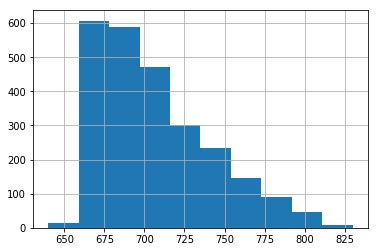

In [10]:
# Plot FICO Score, as it is the primary determinant of interest rate.

import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
loansmin = pd.read_csv('C:/Users/Rita/Documents/GitHub/DS-Essentials/Linear Regression/loans_clean.csv')
fico = loansmin['FICO.Range']
p = fico.hist()
#plt.hist(fico)

<Figure size 432x288 with 0 Axes>

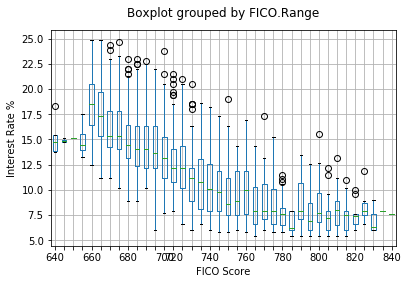

In [20]:
# Box plot - distribution of interest rates based on each FICO score range

import matplotlib.pyplot as plt
import pandas as pd

plt.figure()
loansmin = pd.read_csv('C:/Users/Rita/Documents/GitHub/DS-Essentials/Linear Regression/loans_clean.csv')

p = loansmin.boxplot('Interest.Rate','FICO.Range')
q = p.set_xticklabels(['640','','','','660','','','','680','','','','700','720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])


q0 = p.set_xlabel('FICO Score')
q1 = p.set_ylabel('Interest Rate %')
q2 = p.set_title('')

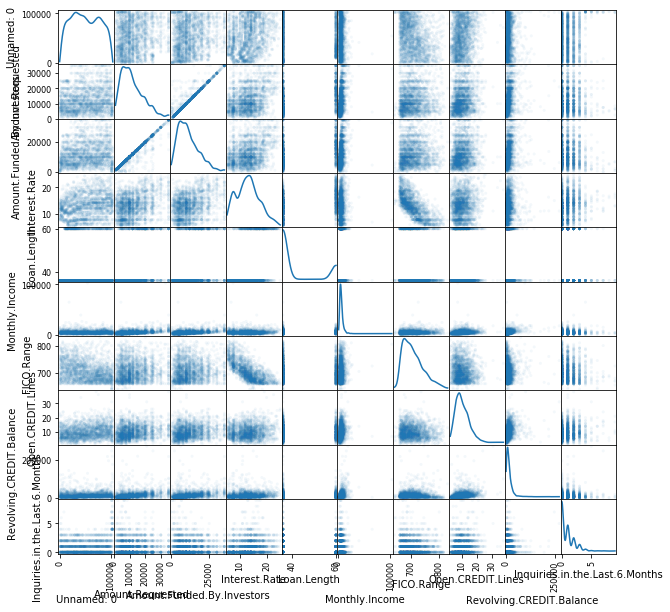

In [23]:
#Scatterplot Matrix - 

import pandas as pd
loansmin = pd.read_csv('C:/Users/Rita/Documents/GitHub/DS-Essentials/Linear Regression/loans_clean.csv')
a = pd.plotting.scatter_matrix(loansmin,alpha=0.05,figsize=(10,10), diagonal='kde')